### Latent Semantic Analysis
##### https://ru.wikipedia.org/wiki/Латентно-семантический_анализ

In [1]:
import re
import nltk
import string
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.extmath import randomized_svd
from nltk.corpus import stopwords
from nltk.stem.snowball import RussianStemmer
stemmer = RussianStemmer()

##### Для демонстрации SVD разложения в задаче Latent semantic analysis используем корпус из 15 русских народных сказок

In [2]:
corpus = []
file_names = os.listdir("tales")
for file_name in file_names:
    tale = open("tales\\"+file_name, "r", encoding = "utf8")
    corpus.append(tale.read())

In [3]:
for i in range(len(file_names)):
    print(i+1, file_names[i])

1 Баба-яга.txt
2 Василиса прекрасная.txt
3 Два Ивана - солдатских сына.txt
4 Заколдованная королевна.txt
5 Иван-царевич.txt
6 Морозко.txt
7 Морской царь и Василиса премудрая.txt
8 Найди мне то не знаю что.txt
9 Никита кожемяка.txt
10 Пастушья дудочка.txt
11 По щучьему велению.txt
12 Сестрица Аленушка и брат Иванушка.txt
13 Снегурочка.txt
14 Финист - ясный сокол.txt
15 Царевна-лягушка.txt


##### Усовершенствуем немного токенайзер nltk, научив его вырезать цифры и стоп-слова

In [4]:
def my_tokenizer(file_text):
    tokens = nltk.word_tokenize(file_text.lower())
    tokens = [stemmer.stem(i) for i in tokens]
    stopWords = stopwords.words('russian')
    stopWords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', 'к', 'на'])
    tokens = [re.sub(r"[0-9]+[,\.][0-9]+|[0-9]+|\.+", "",i) for i in tokens]
    tokens = [i for i in tokens if ((len(i) > 1) and (i not in stopWords))]
    return tokens

##### Составляем матрицу "документ - Nграмм" с помощью TF-IDF. N-gramm range от 1 до 3.

In [5]:
vectorizer = TfidfVectorizer(encoding = string, analyzer = 'word', tokenizer = my_tokenizer, ngram_range = (1,3), use_idf = True)
X = vectorizer.fit_transform(corpus)

In [6]:
X.shape

(15, 37951)

##### Выполняем сингулярное разложение с понижением размерности до 4 (далее объясняется такой выбор размерности)

In [7]:
U, Sigma, VT = randomized_svd(X, n_components = 4, n_iter=100, random_state=None)

##### Выведем наиболее характерные слова для каждой темы.

In [8]:
terms = vectorizer.get_feature_names()
for i, component in enumerate(VT):
    termsComp = zip(terms, component)
    termCompSorted = sorted(termsComp, key = lambda x: x[1], reverse = True)[:3]
    print("Concept %d" %i)
    for term in termCompSorted:
        print(term[0])
    print(" ")

Concept 0
иван-царевич
василис
цар
 
Concept 1
иван-царевич
василис
премудр
 
Concept 2
зме
никит
царевн
 
Concept 3
аленушк
иванушк
хозяин
 


##### Первая тема (Concept 0), соответствующая наибольшему сингулярному числу, имеет тенденцию кореллировать с длиной входного файла и не является информативной, что демонстрируется ниже на диаграмме. Concept 0 не используется для кластеризации, а оставшиеся три темы составляют удобный для визуализации трехмерный базис.

Using matplotlib backend: Qt5Agg


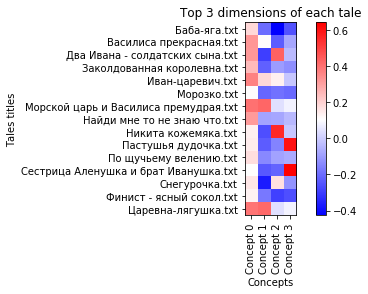

In [9]:

%matplotlib auto
%matplotlib inline
plt.imshow(U, interpolation='none', cmap=plt.cm.bwr)
plt.title("Top 3 dimensions of each tale")

plt.colorbar()
#tick_marks = np.arange(len(classes))
plt.yticks(range(len(file_names)), file_names)
plt.xticks(range(4), ('Concept 0', 'Concept 1',  'Concept 2', 'Concept 3'), rotation = 90)

#print(U)
plt.tight_layout()
plt.ylabel('Tales titles')
plt.xlabel('Concepts')

plt.figure()
plt.show()

In [13]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


##### Откладываем документы в пространстве тем с первой до третьей.

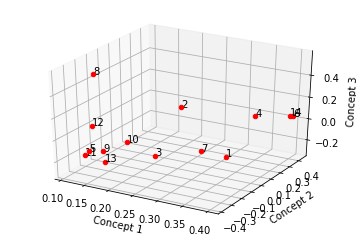

1 Баба-яга.txt
2 Василиса прекрасная.txt
3 Два Ивана - солдатских сына.txt
4 Заколдованная королевна.txt
5 Иван-царевич.txt
6 Морозко.txt
7 Морской царь и Василиса премудрая.txt
8 Найди мне то не знаю что.txt
9 Никита кожемяка.txt
10 Пастушья дудочка.txt
11 По щучьему велению.txt
12 Сестрица Аленушка и брат Иванушка.txt
13 Снегурочка.txt
14 Финист - ясный сокол.txt
15 Царевна-лягушка.txt


In [16]:
%matplotlib notebook
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

#first concept is thrown away


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for i in range(1, U.shape[0]): #plot each point + it's index as text above
    ax.scatter(U[i,0], U[i,1], U[i,2], color='r', depthshade = True) 
    #ax.text(U[i,0], U[i,1], U[i,2], corpus[i], size = 7, zorder=1, color='k')
    ax.text(U[i,0], U[i,1], U[i,2], i, size = 10, zorder = 1, color='k')
    


ax.set_xlabel('Concept 1')
ax.set_ylabel('Concept 2')
ax.set_zlabel('Concept 3')

plt.show()

for i in range(len(file_names)):
    print(i+1, file_names[i])